In [1]:
# Importo librerias y defino configuraciones

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')  # Cambio el estilo de los graficos

sns.set(style="whitegrid")

In [2]:
tipos = {"advertiser_id":"category"}

In [3]:
clicks = pd.read_csv("../../data/clicks.csv.gzip", compression="gzip", dtype=tipos)
installs = pd.read_csv("../../data/installs.csv.gzip", compression="gzip")

## Verificamos la integridad del set de datos

In [4]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null category
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), category(1), float64(11), int64(5), object(2)
memory u

In [5]:
clicks.dtypes

advertiser_id      category
action_id           float64
source_id             int64
created              object
country_code          int64
latitude            float64
longitude           float64
wifi_connection        bool
carrier_id          float64
trans_id             object
os_minor            float64
agent_device        float64
os_major            float64
specs_brand           int64
brand               float64
timeToClick         float64
touchX              float64
touchY              float64
ref_type              int64
ref_hash              int64
dtype: object

In [6]:
clicks.isnull().any()

advertiser_id      False
action_id           True
source_id          False
created            False
country_code       False
latitude           False
longitude          False
wifi_connection    False
carrier_id          True
trans_id           False
os_minor            True
agent_device        True
os_major            True
specs_brand        False
brand               True
timeToClick         True
touchX              True
touchY              True
ref_type           False
ref_hash           False
dtype: bool

In [7]:
clicks.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [8]:
clicks["action_id"].isnull().all()

True

#### La columna de action_id es completamente nula, la podemos descartar.

In [9]:
clicks = clicks.drop("action_id", axis=1)

In [10]:
clicks.sample(5)

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
16257,3,0,2019-03-10T04:17:46.901Z,6333597102633388268,1.205689,1.070234,False,4.0,sXpI5jnp0eWhyXJGdKgCDjB86_up_fg,3.378640e+18,NaN,4.566454e+18,392184377613098015,NaN,8.647,0.321,1.600,1891515180541284343,2143542811270763814
25457,3,0,2019-03-12T15:09:26.035Z,6333597102633388268,1.205689,1.070234,False,4.0,oIN5VyYVWrE_lRWOWHmRlNSEOZSQTLc,6.391567e+18,NaN,7.452406e+18,392184377613098015,NaN,53.471,0.583,2.026,1891515180541284343,2402467287756710978
21978,3,1,2019-03-12T03:10:17.366Z,6333597102633388268,1.205689,1.070234,False,1.0,yHTxaPlwP5aOdcMZ9RRQ3GA-0s04sXA,3.378640e+18,3.729278e+18,4.566454e+18,2733035977666442898,1.0,2.210,0.897,0.025,1891515180541284343,3822973090057971582
11406,3,0,2019-03-11T13:44:35.311Z,6333597102633388268,1.205689,1.070234,False,1.0,t6JCL655N_4re12o5NZdSncwBKVh4qU,7.553676e+18,NaN,7.452406e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,633601243388217331
21961,3,0,2019-03-12T02:59:38.156Z,6333597102633388268,1.205689,1.070234,False,17.0,ZAU-QYAISztj7aW_DDlUud6Wg4T1tik,5.975656e+18,NaN,3.072849e+18,392184377613098015,2.0,8.283,0.729,0.650,1891515180541284343,4796428966188060328


In [11]:
clicks["wifi_connection"].any()

False

#### Todas las filas tienen a False como valor de la columna wifi_connection, por lo que no nos aporta mucho al analisis. #TODO

In [12]:
clicks.describe()

,source_id,country_code,latitude,longitude,carrier_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
count,26351.000000,2.635100e+04,26351.000000,26351.000000,26340.000000,2.633900e+04,3.243000e+03,2.633900e+04,2.635100e+04,6235.000000,22977.000000,23011.000000,23011.000000,2.635100e+04,2.635100e+04
mean,1.245266,6.333597e+18,1.206906,1.070233,7.743812,4.635375e+18,4.171028e+18,3.913451e+18,1.299055e+18,1.482277,230.403309,0.638784,1.478656,1.888100e+18,4.611581e+18
std,2.188948,1.024019e+03,0.004484,0.001896,7.017027,1.642969e+18,2.460496e+18,1.885866e+18,1.149672e+18,1.583764,976.849149,0.301983,2.622727,1.721252e+17,2.673175e+18
min,0.000000,6.333597e+18,1.205058,1.058204,0.000000,6.666626e+17,4.513618e+16,7.436481e+17,3.921844e+17,0.000000,0.017000,0.000000,0.000000,1.494519e+18,9.286192e+14
25%,0.000000,6.333597e+18,1.205689,1.070234,3.000000,3.378640e+18,1.975183e+18,1.774085e+18,3.921844e+17,0.000000,2.915000,0.426000,0.183000,1.891515e+18,2.273798e+18
50%,0.000000,6.333597e+18,1.205689,1.070234,6.000000,3.511538e+18,3.516812e+18,3.072849e+18,3.921844e+17,1.000000,10.588000,0.726000,0.645000,1.891515e+18,4.623721e+18
75%,1.000000,6.333597e+18,1.205689,1.070234,13.000000,6.391567e+18,6.589622e+18,4.566454e+18,2.733036e+18,2.000000,71.703000,0.901000,0.991000,1.891515e+18,6.917850e+18
max,10.000000,6.333597e+18,1.237861,1.085358,116.000000,9.081082e+18,9.221733e+18,7.499732e+18,8.930605e+18,13.000000,17616.188000,1.000000,16.600000,6.323872e+18,9.221118e+18


## 1) Caracteristicas y proveniencia de los clicks

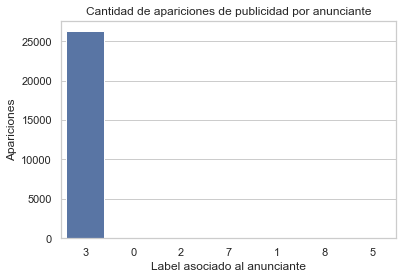

In [13]:
g = sns.countplot(x='advertiser_id', data=clicks, order=clicks['advertiser_id']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado al anunciante")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de apariciones de publicidad por anunciante");

Podemos ver que el anunciante 3 es quien muestra la gran mayoria de las publicidades.

#### Vemos como se distribuye la cantidad de apariciones entre los demas anunciantes, sin incluir al anunciante 3

In [14]:
clicks_anunciante_amplificado = clicks[-clicks["advertiser_id"].isin(['3'])]["advertiser_id"].value_counts()

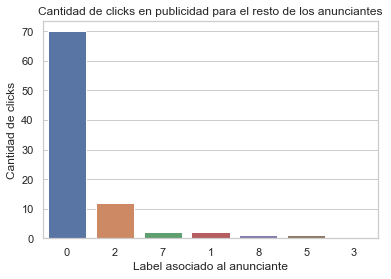

In [15]:
g = sns.countplot(x='advertiser_id', data=clicks[-clicks["advertiser_id"].isin(['3'])], order=\
                  clicks[-clicks["advertiser_id"].isin(['3'])]["advertiser_id"].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado al anunciante")
g.set_ylabel("Cantidad de clicks")
g.set_title("Cantidad de clicks en publicidad para el resto de los anunciantes");  # O sea omito el anunciante 3

In [16]:
clicks["ref_type"].value_counts()  # ¿Deberian ser dos? (Apple o Android) REVISAR

1891515180541284343    25549
1494519392962156891      739
5016171802147987303       58
6323871695571587575        5
Name: ref_type, dtype: int64

In [17]:
clicks["brand"].value_counts()

2.0     2027
0.0     1917
1.0     1521
4.0      240
3.0      186
5.0      129
6.0      124
7.0       32
9.0       31
8.0       16
10.0       8
12.0       3
13.0       1
Name: brand, dtype: int64

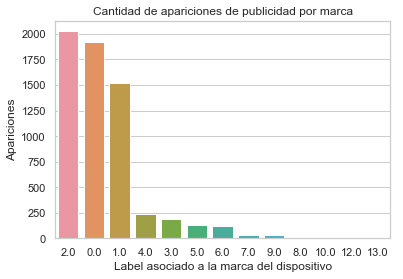

In [18]:
g = sns.countplot(x='brand', data=clicks, order=clicks['brand']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Label asociado a la marca del dispositivo")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de apariciones de publicidad por marca");

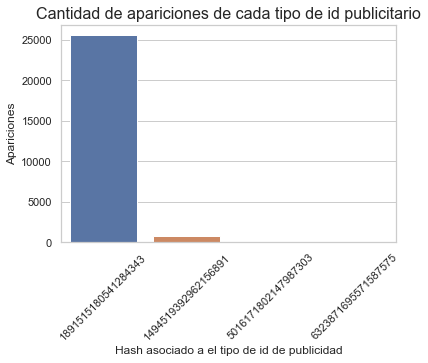

In [19]:
g = sns.countplot(x='ref_type', data=clicks, order=clicks['ref_type']\
                  .value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Hash asociado a el tipo de id de publicidad")
g.set_ylabel("Apariciones")
g.set_title("Cantidad de apariciones de cada tipo de id publicitario", fontsize=16)
g.set_xticklabels(g.get_xticklabels(), rotation=45);


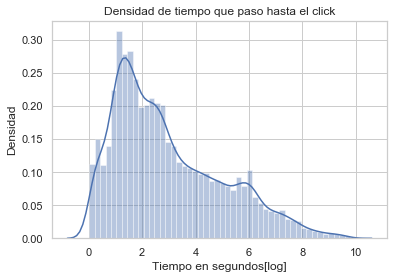

In [20]:
g = sns.distplot(np.log(clicks["timeToClick"].dropna() + 1))
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en segundos[log]")
g.set_ylabel("Densidad");

# VER CUAL DE LOS TRES GRAFICOS USAR

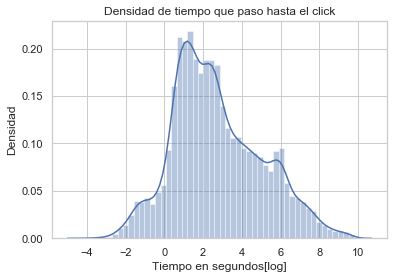

In [21]:
g = sns.distplot(np.log(clicks["timeToClick"].dropna()))
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en segundos[log]")
g.set_ylabel("Densidad");

#### Convierto a milisegundos para poder graficar mejor en escala logaritmica (asi no tengo que lidiar con valores negativos en los ejes, queda raro).

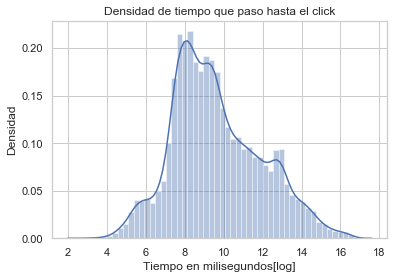

In [22]:
g = sns.distplot(np.log((clicks["timeToClick"].dropna())*1000 + 1))
g.set_title("Densidad de tiempo que paso hasta el click")
g.set_xlabel("Tiempo en milisegundos[log]")
g.set_ylabel("Densidad");

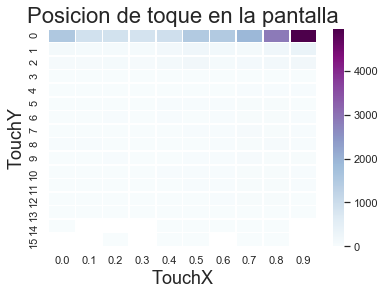

Ver de relacionar:
- Tiempo vs si fue install o no (al parecer es un quilombo porque no hay una forma obvia de relacionar el archivo de installs y el de clicks, ver celda de abajo)
- Posicion de la pantalla donde hizo click con si fue install o no ( idem anterior, deberia poder relacionar los dos archivos)
- Latitude y longitud vs cantidad de clicks ( con un heatmap?)

In [26]:
# Tiempo vs si fue install o no 
# Que miseria che, solo 5 filas quedan haciendo merge
df_i = installs.groupby("ref_hash").filter(lambda x: len(x) == 1)
df_c = clicks[["ref_hash", "timeToClick"]].dropna().groupby("ref_hash").mean()
pd.merge(df_i, df_c, how='inner', on=["ref_hash"])

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,timeToClick
0,2019-03-06 21:33:40.647,7,1891515180541284343,582930240149217282,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,7140852032740295638,3.301378e+18,2.2770
1,2019-03-08 00:30:02.714,7,1891515180541284343,3685364020547088390,NaN,False,True,2970470518450881158,NaN,2.007085e+18,adjust.com,NaN,3212f574-d085-43d8-9f44-c39e0b0dbdfb,app_open,NaN,NaN,4682734745018418779,3.301378e+18,5859.8940
2,2019-03-08 14:10:39.335,7,1891515180541284343,7759178785240189555,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,4175259317777181190,3.301378e+18,17.9015
3,2019-03-11 09:38:31.388,7,1891515180541284343,7190737170444985036,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,7503733330765163556,3.301378e+18,108.8350
4,2019-03-10 08:30:15.346,7,1891515180541284343,2369915544093215150,NaN,False,False,2970470518450881158,NaN,6.882415e+18,adjust.com,NaN,NaN,NaN,NaN,NaN,8945813689569211960,3.301378e+18,0.0950


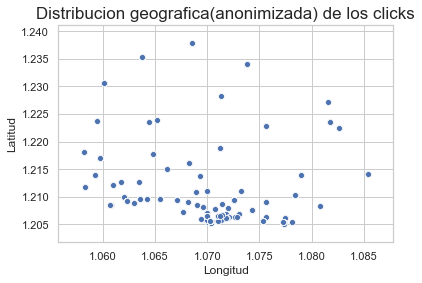

In [55]:
g = sns.scatterplot(x="longitude", y="latitude", data=clicks)
g.set_title("Distribucion geografica(anonimizada) de los clicks", fontsize=17)
g.set_xlabel("Longitud")
g.set_ylabel("Latitud");

#### El grafico nos muestra un distribucion de clicks tal que pareceria haber una mayor concentracion en las longitudes 1.070-1.073 y latitudes 1.205-1.207, junto con una distribucion de varios puntos a la largo del resto del mapa.

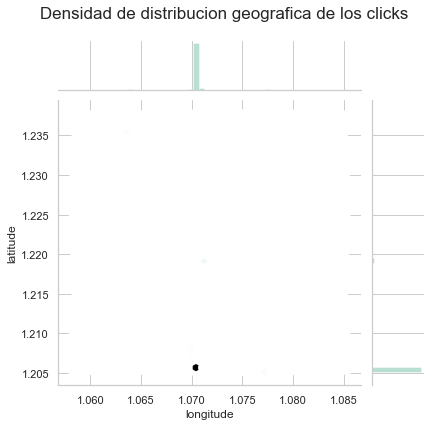

In [51]:
g = sns.jointplot("longitude", "latitude",data=clicks, kind="hex", color="#4CB391")
plt.subplots_adjust(top=0.9)
plt.suptitle("Densidad de distribucion geografica de los clicks", fontsize = 17);

#### Sin embargo si realizamos un grafico de densidad bidimensional podemos ver la gran diferencia de magnitud que hay entre las coordenadas antes mencionadas y el resto del mapa, la inmensa mayoria de los clicks se encuentran en las longitudes 1.070-1.071 y en las latitudes 1.205-1.206

In [28]:
clicks.sample(5)

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,...,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,touchXCategorico,touchYCategorico,actividad
23945,3,6,2019-03-12T18:11:53.912Z,6333597102633388268,1.205058,1.077332,False,13.0,ZnRA01jG18VRzBRqBp3t2hSAphWPOmk,5.975656e+18,...,2733035977666442898,0.0,6.948,0.950,0.102,1891515180541284343,6442013771584061801,0.9,0,1
4470,3,1,2019-03-10T02:07:41.509Z,6333597102633388268,1.205689,1.070234,False,2.0,SxBZNi4Fnf9Yr2-ENeymTelD4yw-PMo,3.511538e+18,...,2733035977666442898,NaN,0.230,0.607,0.531,1891515180541284343,753145568791997201,0.6,0,1
6201,3,1,2019-03-09T05:57:29.118Z,6333597102633388268,1.205689,1.070234,False,10.0,ydN33-JvUQsxwZWf9xgMMBzkd9qXYDk,3.378640e+18,...,2733035977666442898,NaN,3.861,0.908,0.016,1891515180541284343,5556056507346872050,0.9,0,1
24922,3,0,2019-03-12T02:00:03.902Z,6333597102633388268,1.209372,1.067147,False,0.0,C1dCBLTV5F1xS7hjGnBkQvGzFq2M7zE,6.768137e+18,...,392184377613098015,NaN,3.947,0.877,0.517,1891515180541284343,6366030626689400788,0.8,0,1
6158,3,6,2019-03-09T06:10:13.469Z,6333597102633388268,1.205689,1.070234,False,22.0,Xx4pUlqv1jQ904QdDduA6MrMqTs90m0,6.666626e+17,...,2733035977666442898,NaN,2.076,0.934,0.551,1891515180541284343,1430907244968287275,0.9,0,1


In [ ]:
clicks['touchXCategorico'] = pd.cut(clicks['touchX'], bins=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], include_lowest=True,labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
clicks['touchYCategorico'] = pd.cut(clicks['touchY'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16.60], include_lowest=True,labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [ ]:
clicks['actividad'] = 1
for_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='actividad', aggfunc='sum')

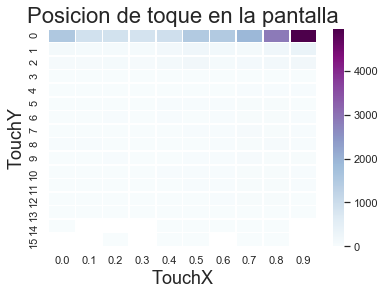

In [53]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Posicion de toque en la pantalla", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18);

In [33]:
timeToClick_heatmap = clicks.pivot_table(columns='touchXCategorico', index='touchYCategorico', values='timeToClick')

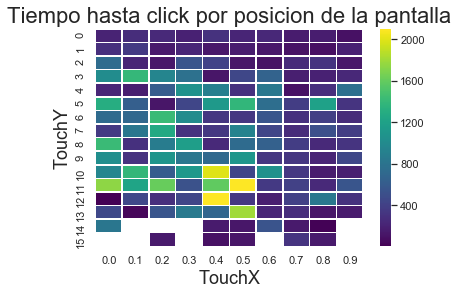

In [35]:
g = sns.heatmap(timeToClick_heatmap, linewidths=.5, cmap="viridis") # annot=True
g.set_title("Tiempo hasta click por posicion de la pantalla", fontsize=22)
g.set_xlabel("TouchX",fontsize=18)
g.set_ylabel("TouchY", fontsize=18);